In [1]:
import requests
import h5py
from matplotlib import pyplot as plt
import numpy as np
from bruges.reflection import zoeppritz_rpp as zoep
from numpy.random import normal, uniform, randn, multivariate_normal

from avo_fit import *
%matplotlib inline

In [2]:
class Rock:
    def __init__(self,vp, vs, rho, vp_std, vs_std, rho_std):
        
        self.vp = vp
        self.vs = vs
        self.rho = rho
        self.vp_std = vp_std
        self.vs_std = vs_std
        self.rho_std = rho_std
    
    def sample(self, N=1):
        
        cov = np.array([[self.vp_std**2,.2,.2],[.2,self.vs_std**2,.2],[.2,.2,self.rho_std**2]])
        
        return multivariate_normal([self.vp, self.vs, self.rho], cov, N)
    

In [3]:
brineSand = Rock(2590.0, 1060.0,2210.0, 100, 100, 100)
shale = Rock(3240.0, 1620.0, 2340.0, 100, 100, 100)
gasSand = Rock(1650.0, 1090.0, 2070.0, 50,50,50)

In [4]:
brineData = brineSand.sample(100)
shaleData = shale.sample(100)
gasData = gasSand.sample(100)

gas_ref = np.array([zoep(shaleData[:,0], shaleData[:,1], shaleData[:,2],
                         gasData[:,0], gasData[:,1], gasData[:,2],
                         theta)
                    for theta in np.arange(0,80,3)])

background_ref = np.array([zoep(shaleData[:,0], shaleData[:,1], shaleData[:,2],
                                brineData[:,0], brineData[:,1], brineData[:,2],
                                theta)
                           for theta in np.arange(0,80,3)])



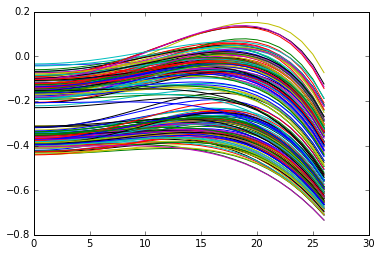

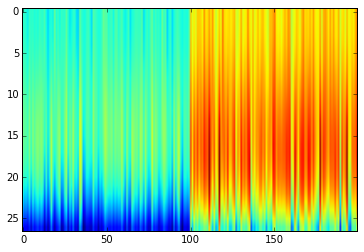

In [5]:
data = np.hstack((gas_ref, background_ref))
plt.figure()
plt.plot(data)
plt.figure()
plt.imshow(data, aspect='auto')
plt.show()

In [27]:
X = data
Y = X
T, obj = minimizer(X, Y, beta=1000.0, zeta=1900.0, delta=2000.0, 
                   max_iter=500, tol=0.0, v=20.0)

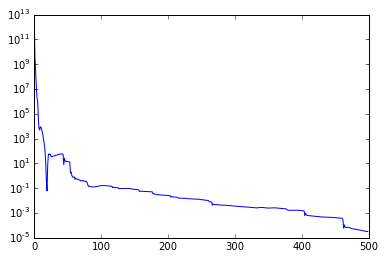

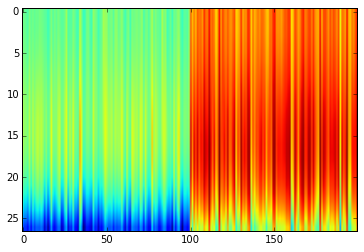

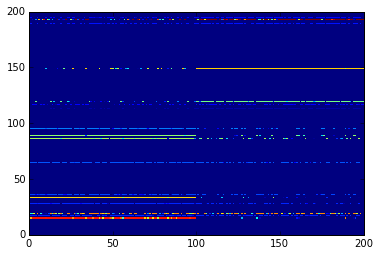

In [28]:
plt.figure()
plt.semilogy(obj)
plt.figure()
plt.imshow(X.dot(T), aspect='auto')
plt.figure()
plt.pcolor(T)

In [31]:
endmember_contribution = np.sum(T,1)
largest_members = np.argsort(endmember_contribution)
print endmember_contribution[largest_members]
basis = X[:,largest_members]

[ 19.55894723  23.908376  ]


(27, 2)

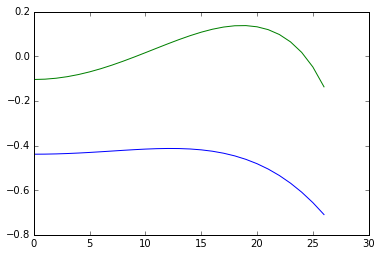

In [32]:
plt.plot(basis)
basis.shape